<a href="https://colab.research.google.com/github/zz231008/-deeplearning/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#4.2.1 ２乗和誤差（回归问题）
import numpy as np
def sum_squared_error(y, t):
  return 0.5 * np.sum((y - t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ]
sum_squared_error(np.array(y), np.array(t))

0.5975

In [6]:
#4.2.2 交差エントロピー誤差,ラベル对应的出力y越大交叉熵叉损失越小（离散分类问题）
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y1), np.array(t))

0.510825457099338

In [7]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ]
cross_entropy_error(np.array(y2), np.array(t))

2.302584092994546

In [4]:
#4.2.3 minibatch learning
import numpy as np
import pandas as pd
train =  pd.read_csv('/content/sample_data/mnist_train_small.csv', header = None)
test = pd.read_csv('/content/sample_data/mnist_test.csv', header = None)
train.shape
x_train = train.iloc[:, 1:]#iloc指定行列抽出,loc指定列名抽出
t_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:]
t_test = test.iloc[:, 0]

In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(20000, 784)
(20000,)
(10000, 784)
(10000,)


In [11]:
train_size = x_train.shape[0]#the number of train_data
train_size#20000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train.iloc[batch_mask]#Use .iloc to select rows by index
t_batch = t_train.iloc[batch_mask]


In [13]:
batch_mask

array([ 6706, 15821,  8843, 10399,  1485,  3708, 14785,  6124,  7690,
        5877])

In [12]:
x_batch

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
6706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#4.2.4 batch with cross_entropy_error
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)#竖着的输出变横着来计算了

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [14]:
#教師データoneーhotではないとき
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size, t)] + 1e-7)) / batch_size

#y[np.arange(batch_size, t)] = np.arange(batch_size)[0, 1, 2, 3, 4] + t[2, 7, 0, 9, 4]
 #[y[0,2], y[1, 7], y[2,0], y[3, 9],y[4,4]]作为索引，提取每个样本中预测的正确类别的概率。
 #y[0] = [0.1, 0.1, 0.7, 0.1, 0,   0,   0, 0, 0, 0]  则y[0,2]=0.7
 #总的来说真实标签one-hot也好不hot也好，
 #就是在找到其标签对应的预测值的概率进行log计算的累加和作为损失值
 #只是公式会有所不同one-hot为[0,1,0,0,0,0,0,0,0]不需要构建索引去找预测概率值

In [17]:
#numerical_diff微分
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2 * h)

def function_1(x):
  return 0.01*x**2 + 0.1*x

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


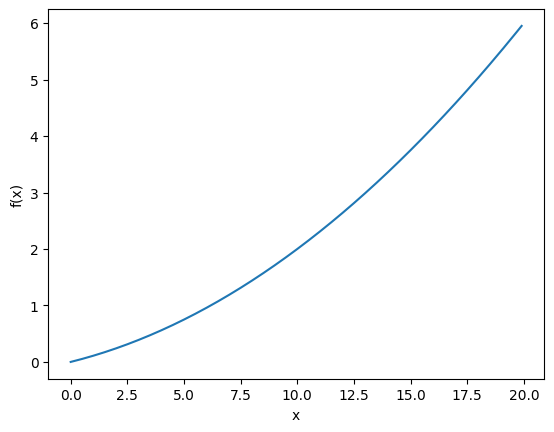

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

0.1999999999990898
0.2999999999986347


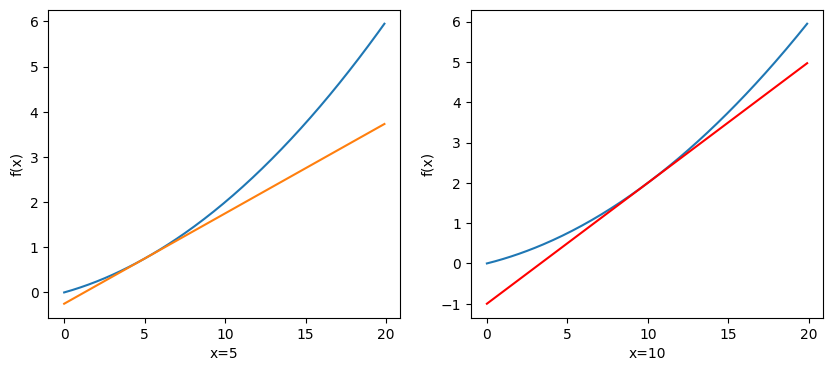

In [44]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)  # 计算导数（即斜率）
    print(d)
    y = f(x) - d * x  # 计算切线在 x 处的截距，f(x)是function_1(x)
    return lambda t: d * t + y  #表示 t 变量的线性方程，等价于 y = d * t + b，返回切线方程的函数

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)# 在 x=5 处计算切线
y2 = tf(x)# 切线在 x 点上的值
tf = tangent_line(function_1, 10)# 在 x=5 处计算切线
y3 = tf(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_xlabel("x=5")
ax1.set_ylabel("f(x)")
ax1.plot(x, y)
ax1.plot(x, y2)
ax2.set_xlabel("x=10")
ax2.set_ylabel("f(x)")
ax2.plot(x, y)
ax2.plot(x, y3, 'r')
plt.show()

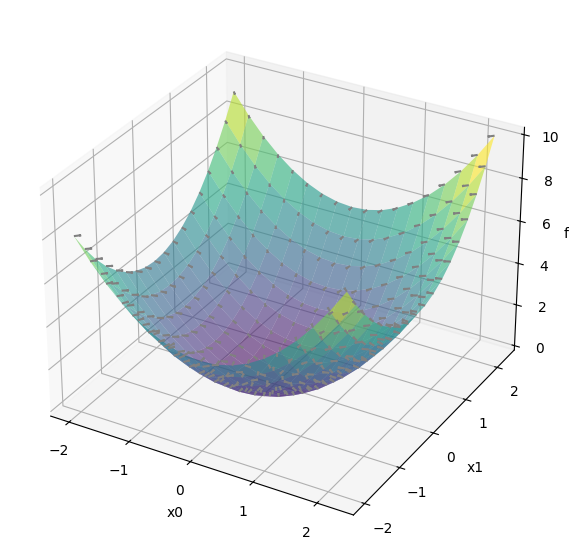

In [52]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# 数值梯度计算函数
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 恢复值

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

# 被求导的函数
def function_2(x):
    return np.sum(x**2, axis=-1)

# 绘制3D图和梯度向量场
if __name__ == '__main__':
    # 定义网格
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    XY = np.stack((X, Y), axis=-1)  # 形状为 (18, 18, 2)
    Z = function_2(XY)

    # 绘制3D曲面图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.6)
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")

    # 计算并绘制梯度向量
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    XY_flat = np.stack((X_flat, Y_flat), axis=-1)  # 形状为 (324, 2)
    Z_flat = function_2(XY_flat)

    grad = numerical_gradient(function_2, XY_flat)
    U = -grad[:, 0]  # X方向的梯度
    V = -grad[:, 1]  # Y方向的梯度
    W = np.zeros_like(U)  # Z方向的梯度为0，因为我们只在XY平面上显示

    ax.quiver(X_flat, Y_flat, Z_flat, U, V, W, color="gray", length=0.1, normalize=True)

    plt.show()
